<a href="https://www.kaggle.com/code/jethrovelasco/ice-cream-sales-analysis-svr?scriptVersionId=167607225" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/polynomial-regression/Ice_cream selling data.csv


# Import the Dataset

In [2]:
dataset = pd.read_csv('/kaggle/input/polynomial-regression/Ice_cream selling data.csv')

# Split the Dataset into Independent and Dependent Variable

In [3]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Reshape the Dependent Variable to Prevent an Error During Implementing the Feature Scaling

In [4]:
y = y.reshape(len(y), 1)

# Implement Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
sc_y = StandardScaler()

X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

# Train the Support Vector Regression Model on the Dataset

In [6]:
from sklearn.svm import SVR

#do not forget to input the kernel, radial basis function
regressor = SVR(kernel = 'rbf')

regressor.fit(X, y)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

# Visualize the Support Vector Regression Results

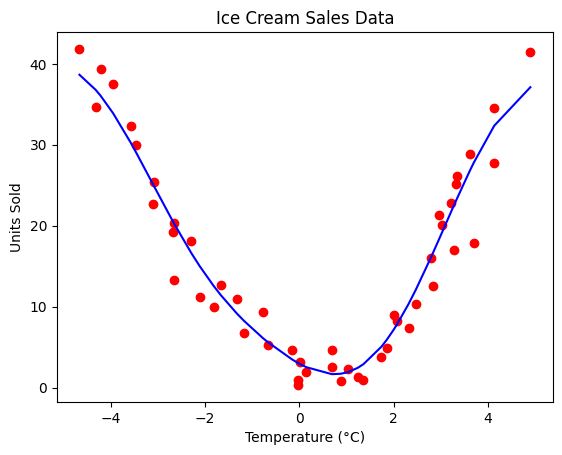

In [7]:
import matplotlib.pyplot as plt

plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1, 1)), color = 'blue')
plt.title('Ice Cream Sales Data')
plt.xlabel('Temperature (°C)')
plt.ylabel('Units Sold')
plt.show()

# Predict the Number of Units to be Sold Based on the New Temperature

In [8]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[4.6]])).reshape(-1,1))

array([[35.80315612]])